# Spam Detector

In [129]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
indices = np.arange(10)

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [130]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [131]:
# The column 'Spam' is the thing you want to predict. 
# Class 0 indicates a benign app and class 1 indicates a malware app
# Using value_counts, how many malware apps are in this dataset?
data["spam"].value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [132]:
# Create the labels set `y` and features DataFrame `X`
# The target column `y` should be the binary `Spam` column.
y = data["spam"]

# Drop the "spam" column and the `X` should be all of the features except the `Spam` column
X = data.copy()
X = X.drop(columns="spam")
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [133]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y_value_counts = y.value_counts()

print(y_value_counts)

spam
0    2788
1    1813
Name: count, dtype: int64


In [134]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [135]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [136]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)

StandardScaler()

In [137]:
# Scale the training data
X_train_scaled = scaler.transform(X_train)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [138]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
import pandas as pd  # Import pandas to handle the DataFrame and saving to CSV

# Create a logistic regression model
logistical_regression = LogisticRegression()

# Train the model on the training data
logistical_regression.fit(X_train, y_train)

# Evaluate the model on the test data
model_score = logistical_regression.score(X_test, y_test)

# Print the model score
print("Logistic Regression Model Score: ", model_score)

# Make predictions using the test data
predictions_test = logistical_regression.predict(X_test)

Logistic Regression Model Score:  0.9296264118158123


/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
# Make predictions using the testing data
predictions_test = logistical_regression.predict(X_test)

In [140]:
#Convert the predictions to a DataFrame
predictions_df = pd.DataFrame(predictions_test, columns=['Predictions'])
#Print the predictions
print(predictions_df)

      Predictions
0               0
1               0
2               0
3               1
4               0
...           ...
1146            0
1147            1
1148            1
1149            0
1150            0

[1151 rows x 1 columns]


In [141]:
# Make and save testing predictions with the saved logistic regression model using the test data
predictions = logistical_regression.predict(X_test)
# Review the predictions
print(predictions[:10])

[0 0 0 1 0 1 0 0 0 0]


In [142]:
# Print the first 10 predictions alongside the actual labels
for i in range(10):
    print(f"Prediction: {predictions[i]}, Actual: {y_test.iloc[i]}")

Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0


In [143]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9296264118158123


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [144]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
#Train the model on the training data
rf_classifier.fit(X_train, y_train)
#Evalute the model using the test data
model_score = rf_classifier.score(X_test, y_test)
# Print the model score
print("Model Score: ", model_score)

Model Score:  0.9574283231972198


In [145]:
# Make and save testing predictions with the saved logistic regression model using the test data
testing_predictions = rf_classifier.predict(X_test)

# Review the predictions
# Print the first 10 predictions alongside the actual labels
for i in range(10):
    print(f"Prediction: {testing_predictions[i]}, Actual: {y_test.iloc[i]}")

# Create a dataframe to compare predictions with actual values
# Print the first 10 predictions alongside the actual labels
for i in range(10):
    print(f"Prediction: {testing_predictions[i]}, Actual: {y_test.iloc[i]}")

Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0


In [146]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, testing_predictions))

0.9574283231972198


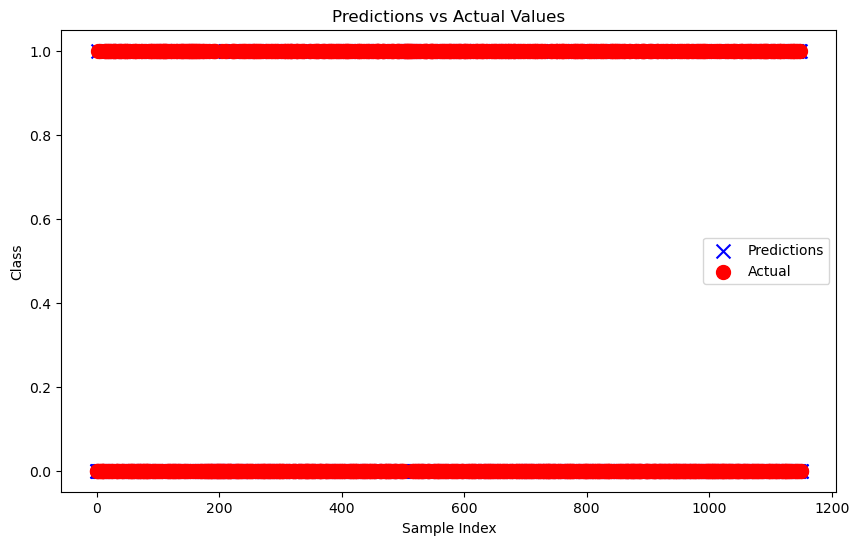

In [154]:
# Add some text for labels, title and custom x-axis tick labels, etc.
import matplotlib.pyplot as plt

# Data for visualization
indices = np.arange(len(testing_predictions))
predictions_sample = testing_predictions
actual_sample = y_test

# Scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(indices, predictions_sample, color='blue', label='Predictions', s=100, marker='x')
plt.scatter(indices, actual_sample, color='red', label='Actual', s=100, marker='o')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions vs Actual Values')
plt.legend()

plt.show()

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*